In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing(as_frame=True).frame
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [52]:
from sklearn.preprocessing import MinMaxScaler

X = data.drop(columns=["MedHouseVal"])
y = data["MedHouseVal"]
X_norm = MinMaxScaler().fit_transform(X)


In [53]:
import numpy as np 
import matplotlib.pyplot as plt
class MultipleLinearRegression(object):
    def __init__(self):
        self.weights = None
        self.last_fit_steps = []
        self.last_fit_errors = []
        self.n_features = None

    def _prepare(self, arr):
        arr = np.asarray(arr)
        if arr.ndim == 1:
            arr = arr.reshape(-1, 1)
        return arr

    def _add_bias_column(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.hstack([ones, X])

    def predict(self, X):
        X = self._prepare(X)
        X_with_bias = self._add_bias_column(X)
        return np.dot(X_with_bias, self.weights)

    def error(self, X, Y):
        X = self._prepare(X)
        Y = np.asarray(Y).flatten()
        predictions = self.predict(X)
        return np.sum((predictions - Y) ** 2) / (2 * len(X))
    
    def show_last_fit_graph(self):
        plt.figure()
        plt.plot(self.last_fit_steps, self.last_fit_errors, 'g')
        plt.xlabel('Step')
        plt.ylabel('Error')
        plt.title('Gradient Descent Error (Multiple Regression)')
        plt.show()

    def show_model(self, X, Y):
        X = self._prepare(X)
        Y = np.asarray(Y).flatten()
        predictions = self.predict(X)
        
        plt.figure()
        plt.scatter(predictions, Y, alpha=0.6, label='Actual vs Predicted')
        plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', label='Perfect Prediction')
        plt.xlabel('Predicted Values')
        plt.ylabel('Actual Values')
        plt.title('Multiple Linear Regression: Actual vs Predicted')
        plt.legend()
        plt.show()
        
        # R^2 score
        ss_res = np.sum((Y - predictions) ** 2)
        ss_tot = np.sum((Y - np.mean(Y)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        print(f"R² Score: {r2:.4f}")

    def fit(self, X, Y, alpha=0.01, accuracy=0.01, max_steps=5000):
        X = self._prepare(X)
        Y = np.asarray(Y).flatten()
    
        
        self.n_features = X.shape[1]
        self.weights = np.zeros(self.n_features + 1)
        
        X_with_bias = self._add_bias_column(X)
        
        self.last_fit_errors, self.last_fit_steps = [], []
        m = len(X)
        
        step = 0
        while step < max_steps:
            predictions = np.dot(X_with_bias, self.weights)
            error = predictions - Y
            dw = np.dot(X_with_bias.T, error) / m

            self.weights -= alpha * dw
            
            new_err = np.sum(error ** 2) / (2 * m)
            
            step += 1
            self.last_fit_steps.append(step)
            self.last_fit_errors.append(new_err)
            
            if new_err < accuracy:
                print(f'Accuracy reached at step {step}. Final error: {new_err:.6f}')
                break
                
            if step > 1 and self.last_fit_errors[-1] > self.last_fit_errors[-2]:
                alpha /= 2
                print(f'Error increased at step {step}. New alpha: {alpha:.6f}')
                
        else: 
            print(f'Max steps ({max_steps}) reached. Final error: {new_err:.6f}')
            
        return self.last_fit_steps, self.last_fit_errors

    def get_coefficients(self):
        """Возвращает коэффициенты модели"""
        return {
            'bias': self.weights[0],           
            'weights': self.weights[1:],     
            'features': self.n_features
        }


Max steps (1500000) reached. Final error: 0.262200


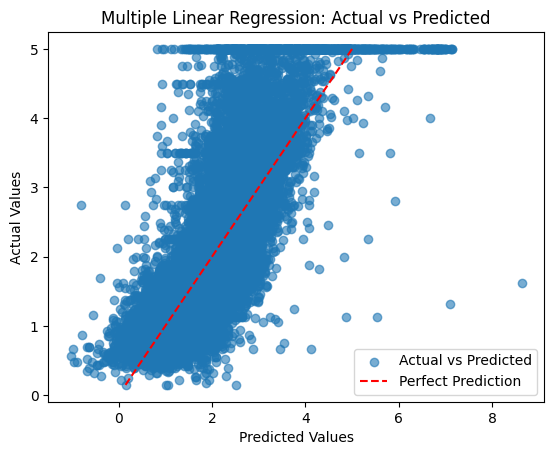

R² Score: 0.6062


In [79]:
model = MultipleLinearRegression()
steps, errors = model.fit(X_norm, y, alpha=0.1, accuracy=0.0001, max_steps=1500000)
model.show_model(X_norm, y)

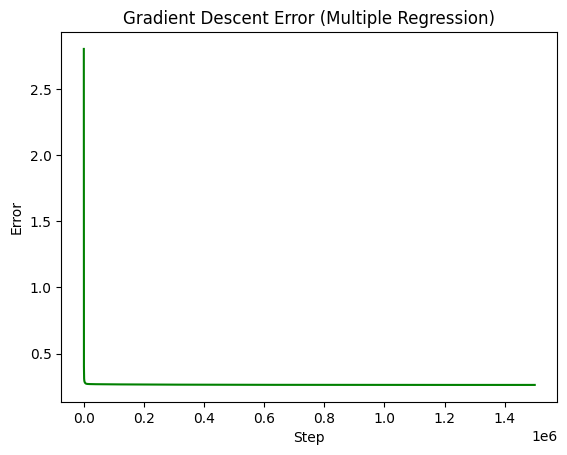

In [81]:
model.show_last_fit_graph()

Error increased at step 2. New alpha: 0.000000
Error increased at step 3. New alpha: 0.000000
Max steps (350000) reached. Final error: 0.489920


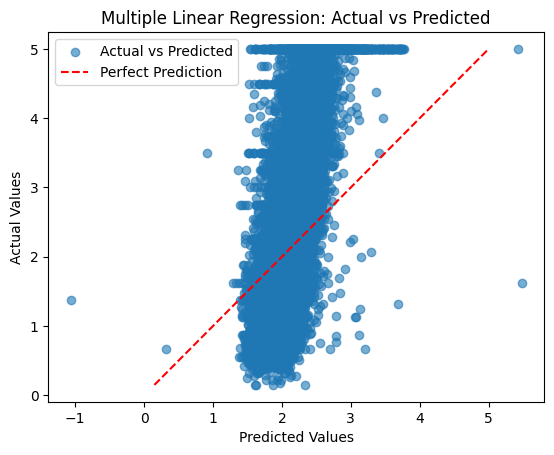

R² Score: 0.2641


In [75]:
model2 = MultipleLinearRegression()
steps, errors = model2.fit(X, y, alpha=10**-6, accuracy=10**-9, max_steps=350000)
model2.show_model(X, y)

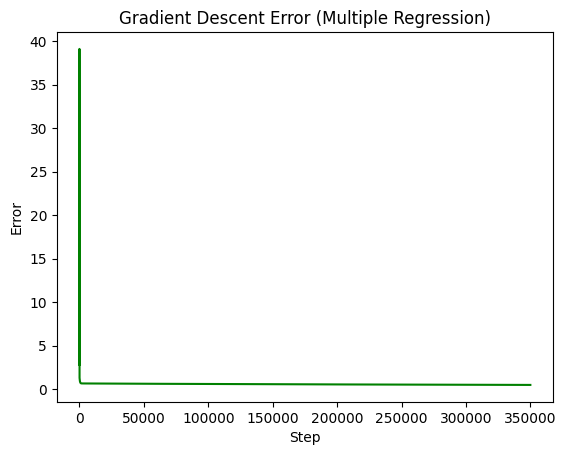

In [80]:
model2.show_last_fit_graph()

Max steps (100000) reached. Final error: 0.657328


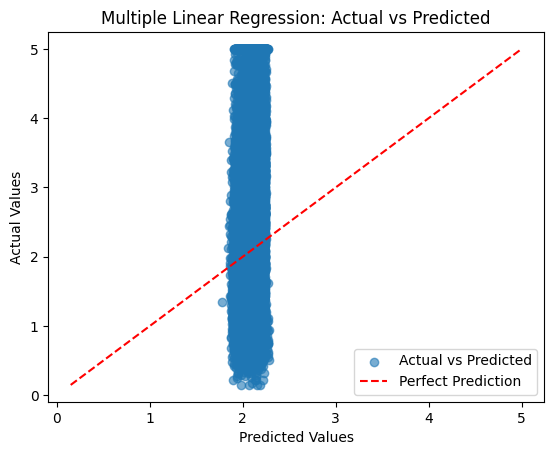

R² Score: 0.0127


In [85]:
model3 = MultipleLinearRegression()
steps, errors = model3.fit(X, y, alpha=10**-8, max_steps=100000)
model3.show_model(X, y)